Saving Sample - Superstore.csv to Sample - Superstore.csv
First 5 Rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Regio

/tmp/ipython-input-1-3988745131.py:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


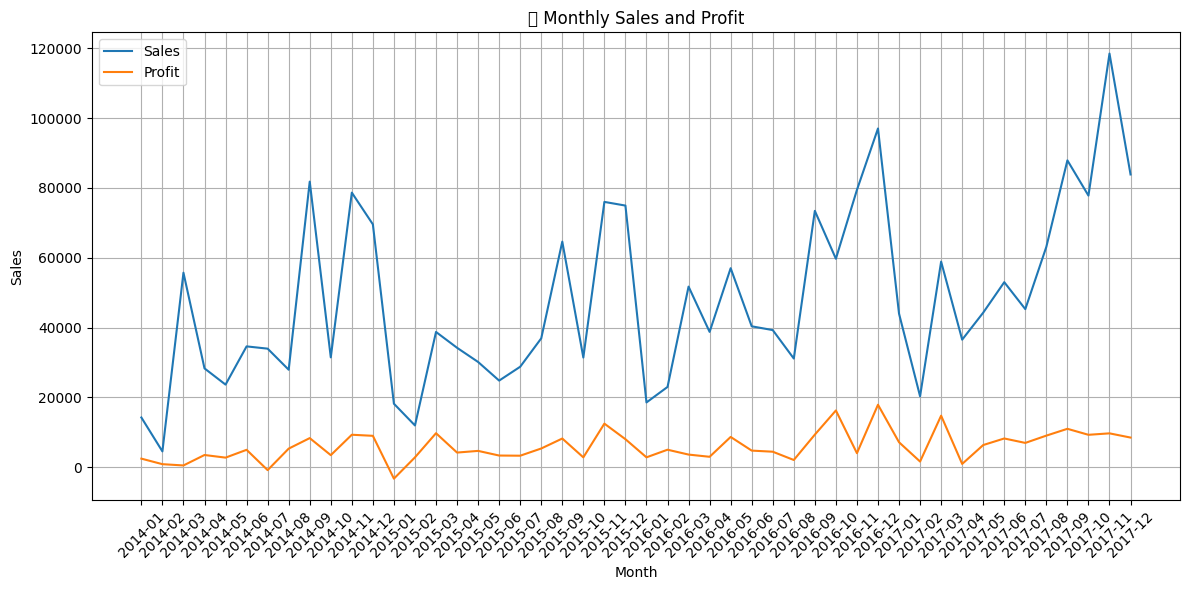

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


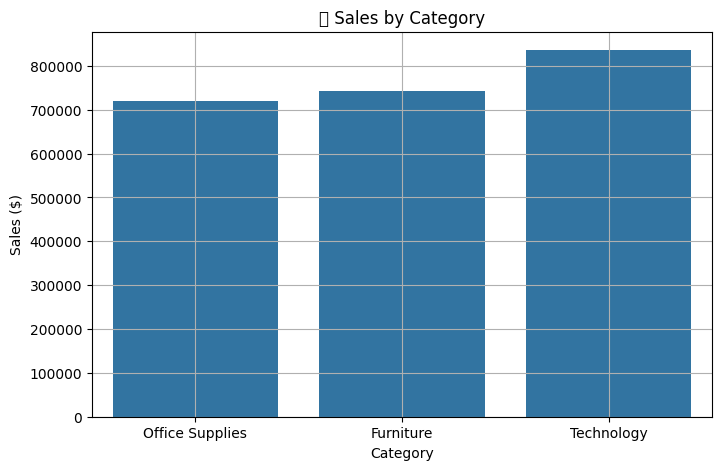

/tmp/ipython-input-1-3988745131.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_profit.index, y=subcat_profit.values, palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


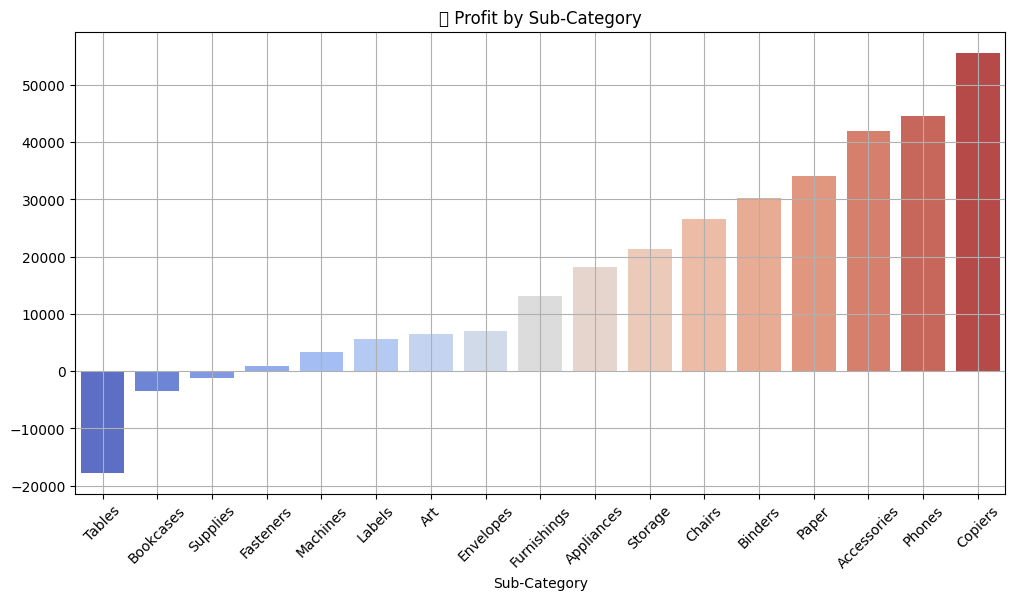

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


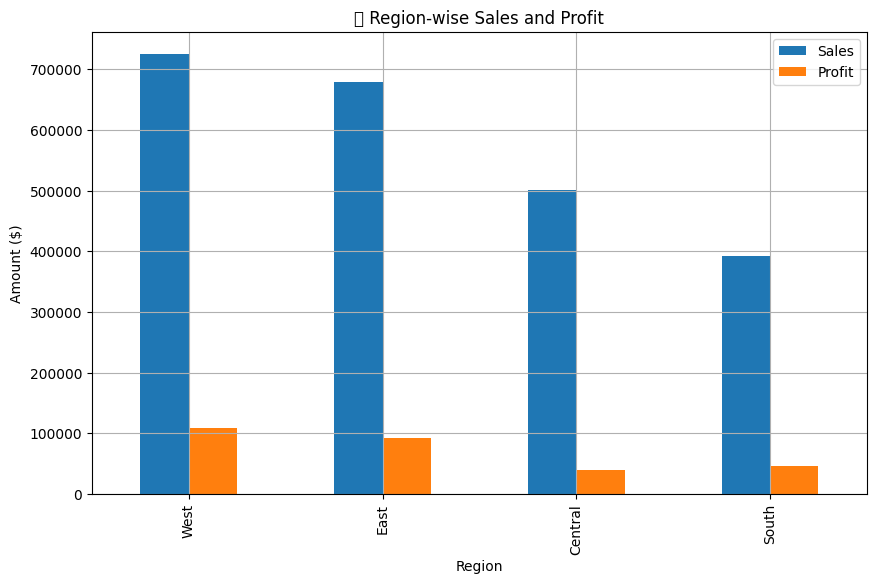

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


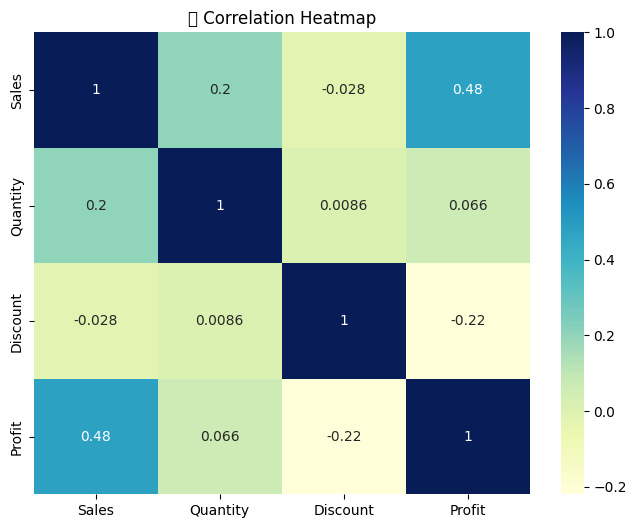

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]), encoding='ISO-8859-1')
print("First 5 Rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
print("\nSummary Statistics:")
print(df[['Sales', 'Profit']].describe())
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly = df.groupby('Month')[['Sales', 'Profit']].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x='Month', y='Sales', label='Sales')
sns.lineplot(data=monthly, x='Month', y='Profit', label='Profit')
plt.xticks(rotation=45)
plt.title('📈 Monthly Sales and Profit')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,5))
cat_sales = df.groupby('Category')['Sales'].sum().sort_values()
sns.barplot(x=cat_sales.index, y=cat_sales.values)
plt.title('🛒 Sales by Category')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()
plt.figure(figsize=(12,6))
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
sns.barplot(x=subcat_profit.index, y=subcat_profit.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('💰 Profit by Sub-Category')
plt.grid(True)
plt.show()
region = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
region.plot(kind='bar', figsize=(10,6))
plt.title('📍 Region-wise Sales and Profit')
plt.ylabel('Amount ($)')
plt.grid(True)
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='YlGnBu')
plt.title('📊 Correlation Heatmap')
plt.show()
